# Проект телекоммуникации

## Описание данных , план работы.

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

### Описание услуг

Оператор предоставляет два основных типа услуг: 

Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.

Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line, «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic).

Также доступны такие услуги:

Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);

Выделенная линия технической поддержки (TechSupport);

Облачное хранилище файлов для резервного копирования данных (OnlineBackup);

Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

### Описание данных

Данные состоят из файлов, полученных из разных источников:

contract_new.csv — информация о договоре;

personal_new.csv — персональные данные клиента;

internet_new.csv — информация об интернет-услугах;

phone_new.csv — информация об услугах телефонии.

Во всех файлах столбец customerID содержит код клиента.
Информация о договорах актуальна на 1 февраля 2020.

### Цели и задачи

Цель: Спрогноизровать отток клиентов с помощью моделей машинного обучения , чтобы компания-заказчик смогла сократить количество уходящих клиентов. 

Необходиом решить задачу классификации

Задачи:

    1. Загрузить и ознакомиться подобнее с данными.
    2. Провести предобработку данных.
    3. Провести исследовательский анализ данных.
    4. Подготовить данных к обучению
    5. Обучить несколько моделей и выбор лучшей
    6. Тестировка лучшей модели 
    7. Написать выводы по работе

###  План работы

1. Постановка задачи и цели, описание  начальных данных 
2. Первичное ознакомление с данными
3. Предобработка данных(выявление аномалий,пропусков,дубликатов;выделение целевого признака; редактирование типов данных)
4. Исследовательский анализ данных(исследовние зависимостей,корреляции, показательные графики, исследование распределения признаков)
5. Подготовка данных к обучению(Разделение данных на обучающую и тестовую выборки, выделение целевого признака,кодирование и масштабирование)
6. Обучение нескольких моделей на обучающей выборке и выбор наилучшей модели (подбор парамтеров и улучшение моделей,оценка важности признаков лучшей модели и матрица ошибок)
7. Проверка лучшей модели на тестовой выборке
8. Выводы по проекту и проведение итогов 

## Ознакомление с данными

Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler
)
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve,make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from catboost import CatBoostClassifier
from sklearn.compose import make_column_transformer
import warnings
from sklearn.pipeline import make_pipeline
#!pip install phik

from phik import report
from phik.report import plot_correlation_matrix
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'phik'

Загрузим датасеты

In [2]:
df_contract = pd.read_csv('/datasets/contract_new.csv')
df_internet = pd.read_csv('/datasets/internet_new.csv')
df_personal = pd.read_csv('/datasets/personal_new.csv')
df_phone = pd.read_csv('/datasets/phone_new.csv')

посмотрим как устроены датасеты , изучим их содержние и структуру.

In [3]:
for data in [df_contract, df_internet, df_personal, df_phone]:
    display(data.head())
    data.info()
    display(data.describe())
    print('-------------------------------------------------------------------------------------------')

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


-------------------------------------------------------------------------------------------


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,7590-VHVEG,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


-------------------------------------------------------------------------------------------


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


-------------------------------------------------------------------------------------------


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,5575-GNVDE,No
freq,1,3390


-------------------------------------------------------------------------------------------


Датасеты:
- contract_new.csv — информация о договоре;
- personal_new.csv — персональные данные клиента;
- internet_new.csv — информация об интернет-услугах;
- phone_new.csv — информация об услугах телефонии.

Признаки:
- BeginDate – дата начала пользования услугами,
- EndDate – дата окончания пользования услугами,
- Type – тип оплаты: ежемесячный, годовой и тд,
- PaperlessBilling – электронный платёжный документ,
- PaymentMethod – способ оплаты,
- MonthlyCharges – ежемесячные траты на услуги по договору,
- TotalCharges – всего потрачено денег на услуги,
- Dependents – наличие иждивенцев,
- Senior Citizen – наличие пенсионного статуса по возрасту,
- Partner – наличие супруга(и),
- MultipleLines – наличие возможности ведения параллельных линий во время звонка

Изучили первоначальную информацию о датасете.Информация  дана о 7043 пользователях, которые пользуются услугами компании.Из них 5517 полузуются услугами Интернета и 6361 - стационарным телефоном.
Судя по таблицам пропусков нет, но надо привести названия столбцов к стандартному виду, проверить наличе дубликатов и аномалий.
Еще необходимо поработать с типами данных, потому что практически все представлены в виде object.

# Предобработка данных

Для начала приведем все наименования столбцов к стандратному виду

In [4]:
df_contract = df_contract.rename(columns={
                                          'customerID':'customer_id', 
                                          'BeginDate':'begin_date', 
                                          'EndDate':'end_date', 
                                          'Type':'type', 
                                          'PaperlessBilling':'paperless_billing',
                                          'PaymentMethod':'payment_method',
                                          'MonthlyCharges':'monthly_charges',
                                          'TotalCharges':'total_charges'
})

df_internet = df_internet.rename(columns={'customerID':'customer_id', 
                                          'InternetService':'internet_service', 
                                          'OnlineSecurity':'online_security', 
                                          'OnlineBackup':'online_backup',
                                          'DeviceProtection':'device_protection', 
                                          'TechSupport':'tech_support', 
                                          'StreamingTV':'streaming_tv', 
                                          'StreamingMovies':'streaming_movies'                     
})

df_personal = df_personal.rename(columns={'customerID':'customer_id', 
                                          'SeniorCitizen':'senior_citizen', 
                                          'Partner':'partner', 
                                          'Dependents':'dependents'  
})

df_phone = df_phone.rename(columns={'customerID':'customer_id', 
                                    'MultipleLines':'multiple_lines'
})

Исследуем на наличие пропусков и дубликатов

In [5]:
for data in [df_contract, df_internet, df_personal, df_phone]:
    print('Количество пропусков')
    print(data.isna().sum())
    print('Количество дубликатов')
    print(data.duplicated().sum())
    print('-------------------------------------------------------------------------------------------')

Количество пропусков
customer_id          0
begin_date           0
end_date             0
type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
dtype: int64
Количество дубликатов
0
-------------------------------------------------------------------------------------------
Количество пропусков
customer_id          0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
dtype: int64
Количество дубликатов
0
-------------------------------------------------------------------------------------------
Количество пропусков
customer_id       0
gender            0
senior_citizen    0
partner           0
dependents        0
dtype: int64
Количество дубликатов
0
-------------------------------------------------------------------------------------------
Количество пропусков
customer_id       0
multiple_lines    0
dtype: int64
Количест

Пропусков и дубликатов не обнаружено.

Будем проводить предобработку поочередно с каждым датасетом

In [6]:
display(df_contract.head(10))

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5
5,9305-CDSKC,2019-03-01,No,Month-to-month,Yes,Electronic check,99.65,1150.96
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,2058.21
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,300.48
8,7892-POOKP,2017-07-01,No,Month-to-month,Yes,Electronic check,104.80,3573.68
9,6388-TABGU,2014-12-01,2017-05-01,One year,No,Bank transfer (automatic),56.15,1628.35


In [7]:
df_contract['begin_date'] = pd.to_datetime(df_contract['begin_date'], format='%Y-%m-%d')
df_contract['total_charges'] = df_contract['total_charges'].apply(lambda x: 0 if x == ' ' else x).astype(float)

Есть строки , где суммарные затраты равняются нулю приравняем такие к месячным

In [8]:
df_contract[df_contract['total_charges'] == 0]

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,0.0
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,0.0
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,0.0
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,0.0
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,0.0
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,0.0
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,0.0
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,0.0
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,0.0
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,0.0


In [9]:
df_contract.loc[df_contract['total_charges'] == 0, 'total_charges'] = df_contract['monthly_charges']

Столбец finished будет целевым признаком, он будет основан на основе признака end_date. Если в столбце end_date будет значение с датой, значит клиент перестал пользоваться услугами компании, и тогда finished примет значение 1. Если в end_date значение No -  значение 0.

In [10]:
df_contract['finished'] = 1
df_contract.loc[df_contract['end_date'] == 'No', 'finished'] = 0

Далее сформируем новый признак указывающий, сколько дней сцммарно пользовался клиент сервисом. Потом удалим ненадобные нам уже столбцы связанные с датой , а также столбец paperless_billing который указывает на способ получения чека.

In [11]:

df_contract['end_date'] = df_contract['end_date'].apply(lambda x: '2020-02-01' if x == 'No' else x)

In [12]:
df_contract['begin_date'] = pd.to_datetime(df_contract['begin_date'], format = '%Y-%m-%d')
df_contract['end_date'] = pd.to_datetime(df_contract['end_date'], format = '%Y-%m-%d')
df_contract['day_used'] = (df_contract['end_date'] - df_contract['begin_date']).apply(lambda s: s.days)

df_contract = df_contract.drop(['end_date', 'begin_date'], axis=1)

In [13]:
df = df_contract.merge(df_internet, 
                      how='left', on='customer_id').merge(df_personal, 
                      how='left', on='customer_id').merge(df_phone, 
                      how='left', on='customer_id') 

In [14]:
display(df.head())
df.info()

,customer_id,type,paperless_billing,payment_method,monthly_charges,total_charges,finished,day_used,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,gender,senior_citizen,partner,dependents,multiple_lines
0,7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,31.04,0,31,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,NaN
1,5575-GNVDE,One year,No,Mailed check,56.95,2071.84,0,1036,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No
2,3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,226.17,0,123,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,No
3,7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1960.60,0,1371,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,NaN
4,9237-HQITU,Month-to-month,Yes,Electronic check,70.70,353.50,0,153,Fiber optic,No,No,No,No,No,No,Female,0,No,No,No


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   type               7043 non-null   object 
 2   paperless_billing  7043 non-null   object 
 3   payment_method     7043 non-null   object 
 4   monthly_charges    7043 non-null   float64
 5   total_charges      7043 non-null   float64
 6   finished           7043 non-null   int64  
 7   day_used           7043 non-null   int64  
 8   internet_service   5517 non-null   object 
 9   online_security    5517 non-null   object 
 10  online_backup      5517 non-null   object 
 11  device_protection  5517 non-null   object 
 12  tech_support       5517 non-null   object 
 13  streaming_tv       5517 non-null   object 
 14  streaming_movies   5517 non-null   object 
 15  gender             7043 non-null   object 
 16  senior_citizen     7043 

Так как появились пропуски после объединения, посмотрим на их количество

In [15]:
df.isna().sum()

customer_id             0
type                    0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges           0
finished                0
day_used                0
internet_service     1526
online_security      1526
online_backup        1526
device_protection    1526
tech_support         1526
streaming_tv         1526
streaming_movies     1526
gender                  0
senior_citizen          0
partner                 0
dependents              0
multiple_lines        682
dtype: int64

In [16]:
df = df.fillna('NotUsed')

И удалим далее ненужный столбец с айди

In [17]:
df=df.drop('customer_id', axis = 1)

Предобработка данных завершена: пропуски заполнены,ненужные признаки удалены ,все датасеты объединены в один.

# Исследовательский анализ данных

Посмотрим для начала распределение признаков.

Изучим портрет клиента

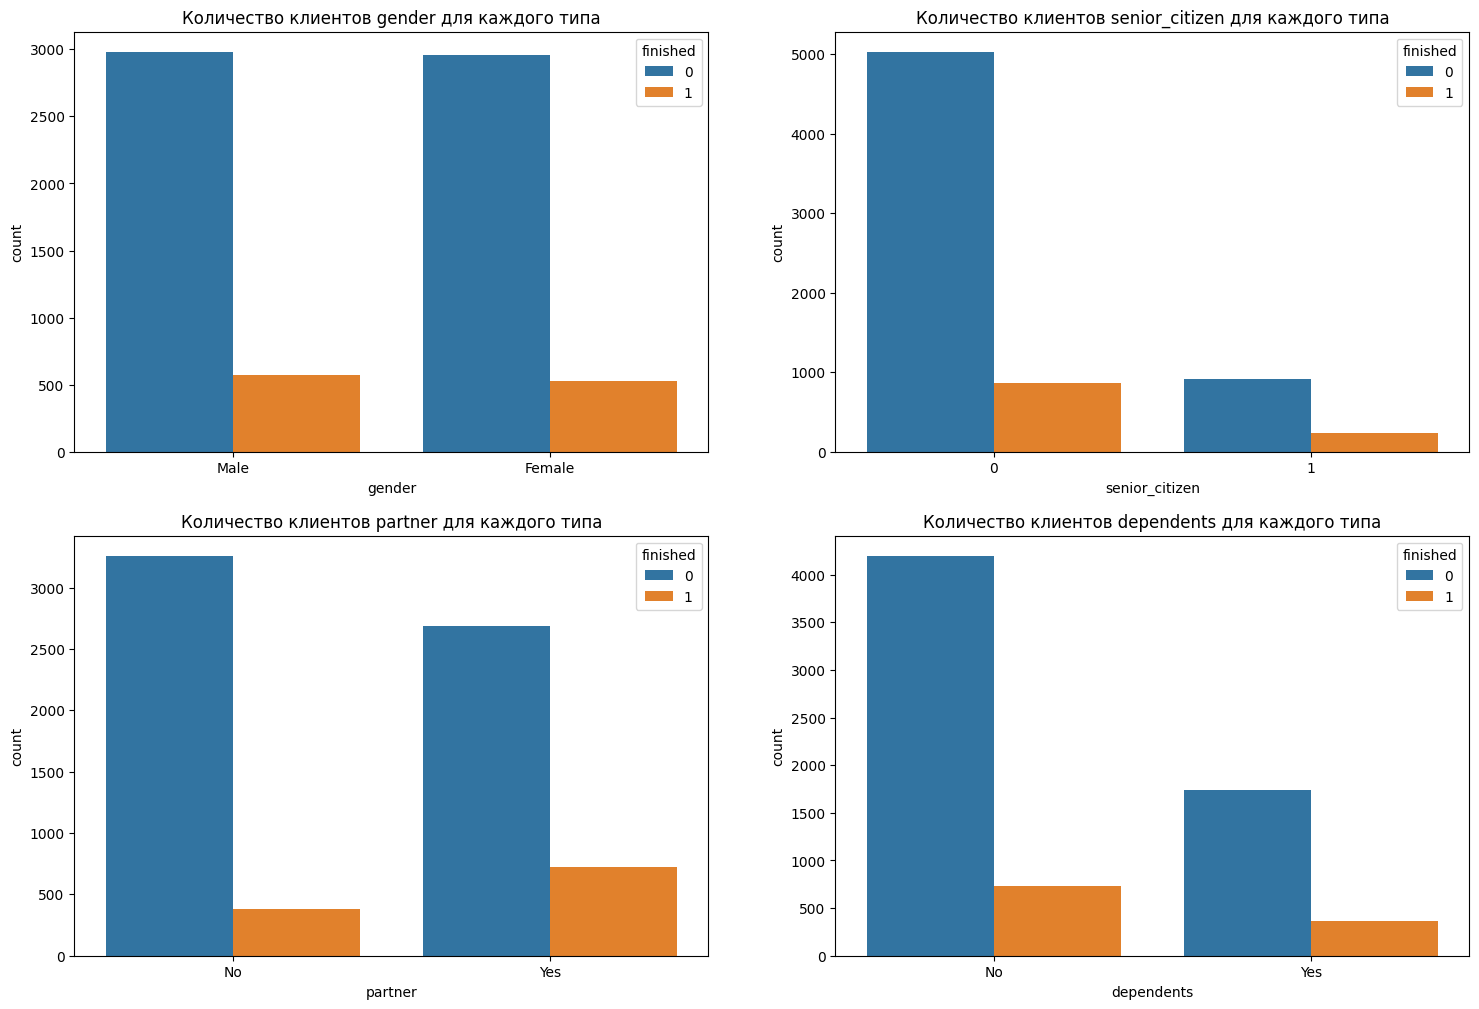

In [18]:
portrait = ['gender', 'senior_citizen', 'partner', 'dependents']

fig = plt.figure(figsize=(18,12)) 
for i, column in enumerate(portrait):
    plt.subplot(2,2,i+1)
    plt.title(f'Количество клиентов {column} для каждого типа')
    data = df[column].groupby(df['finished']).value_counts().rename('count').reset_index()
    sns.barplot(x=column, y='count', hue='finished', data=data)

    1. От пола не зависит уйдет клиент или нет
    2. Люди не имеющие супруга чаще уходят
    3. клиентов не имеющих иждтвенцев гораздо больше, и они как раз чаще расторгают договор.
    4. Пенсионеров гораздо меньше , и количество пенисонеров расторгнувших договор достаточно много .

Посмотрим на корреляции признаков.

In [19]:
correlation = df.phik_matrix(interval_cols =['monthly_charges', 'total_charges',  'day_used'])

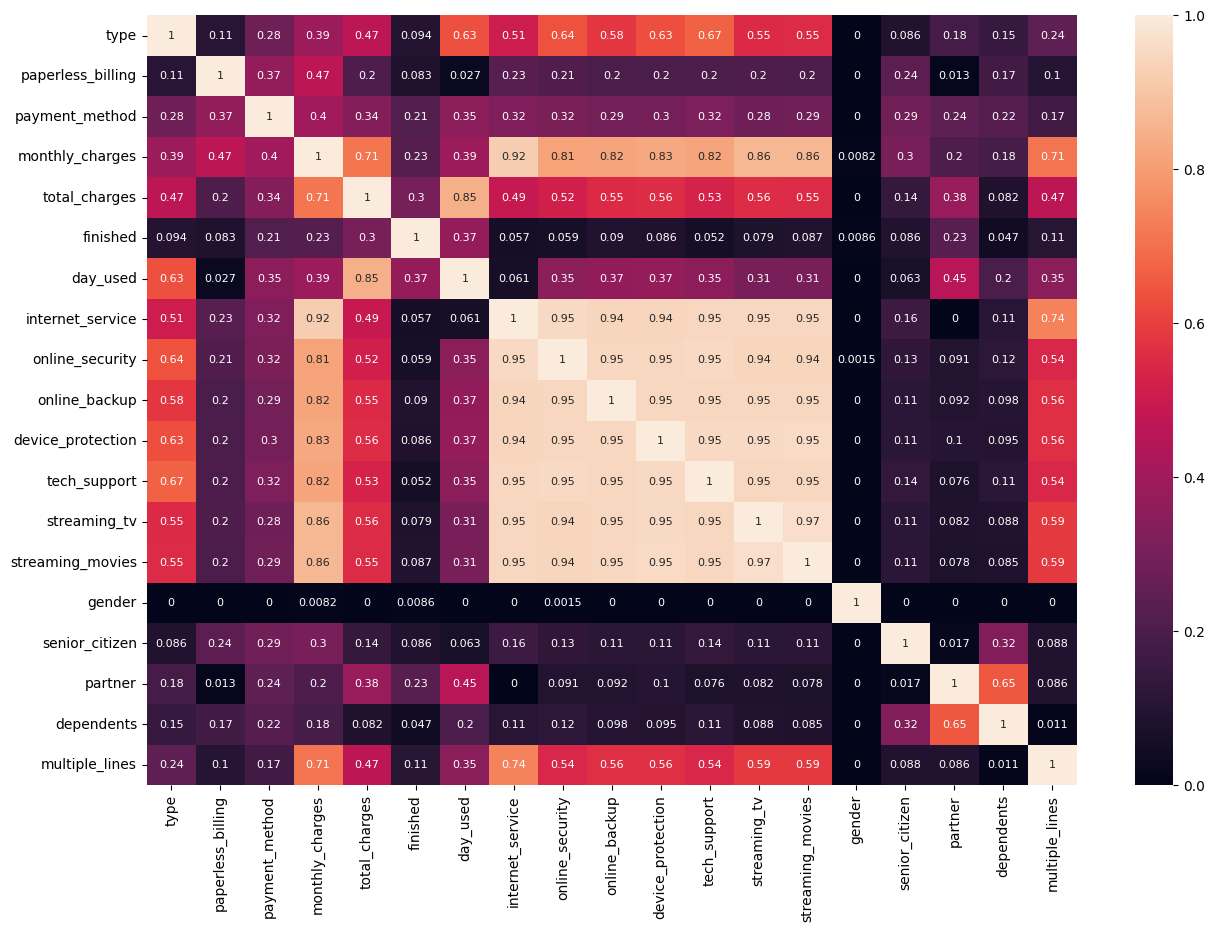

In [20]:
plt.figure(figsize=(15, 10))
sns.heatmap(correlation, annot=True, annot_kws={'fontsize': 8})
plt.show()

Видно, что между большинством признаков нет прямых зависимостей. У всего блока интернета сильная корреляция между собой. Это произошло из-за того, что такие признаки  очевидно связаны между собой. Но удалять весь блок думаю было бы опрометчиво поэтому удалим некоторые из них.

У признака gender нет связи с целевым поэтому его можно удалить. Также удалим признаки dependets и total_charges

In [21]:
df = df.drop('gender',axis = 1)
df = df.drop('dependents',axis = 1)
df= df.drop('total_charges',axis =1)

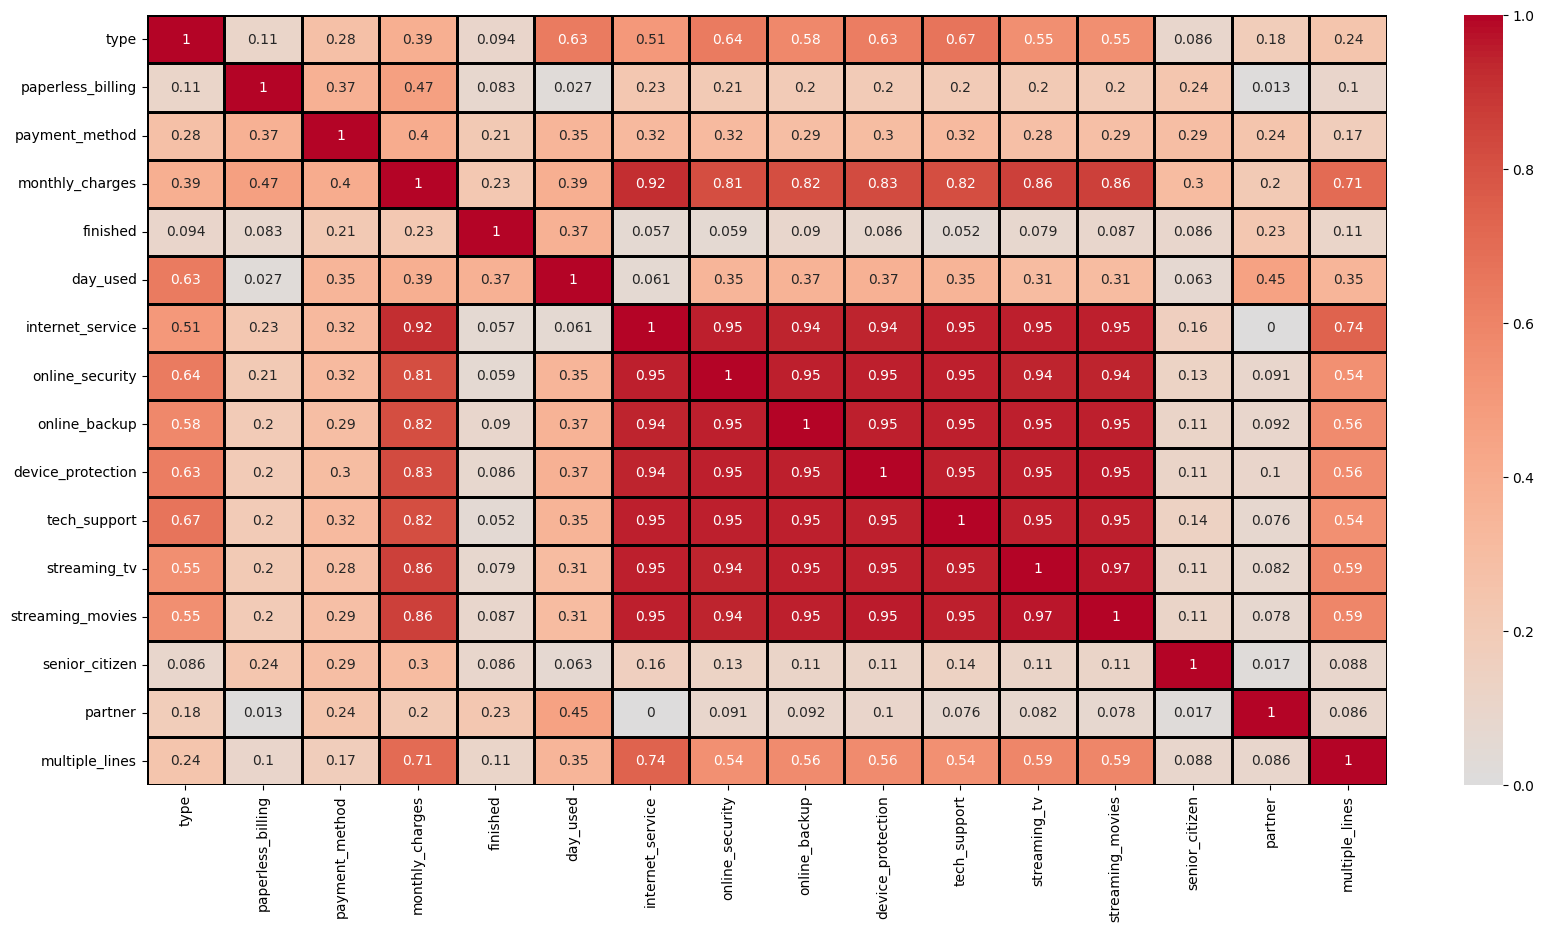

In [22]:
interval = ['monthly_charges', 'day_used']
plt.figure(figsize=(20, 10))
sns.heatmap(df.phik_matrix(interval_cols=interval), cmap='coolwarm', center=0, annot=True, linewidths=2, linecolor='black');

Посмотрим на распределение остальных признаков

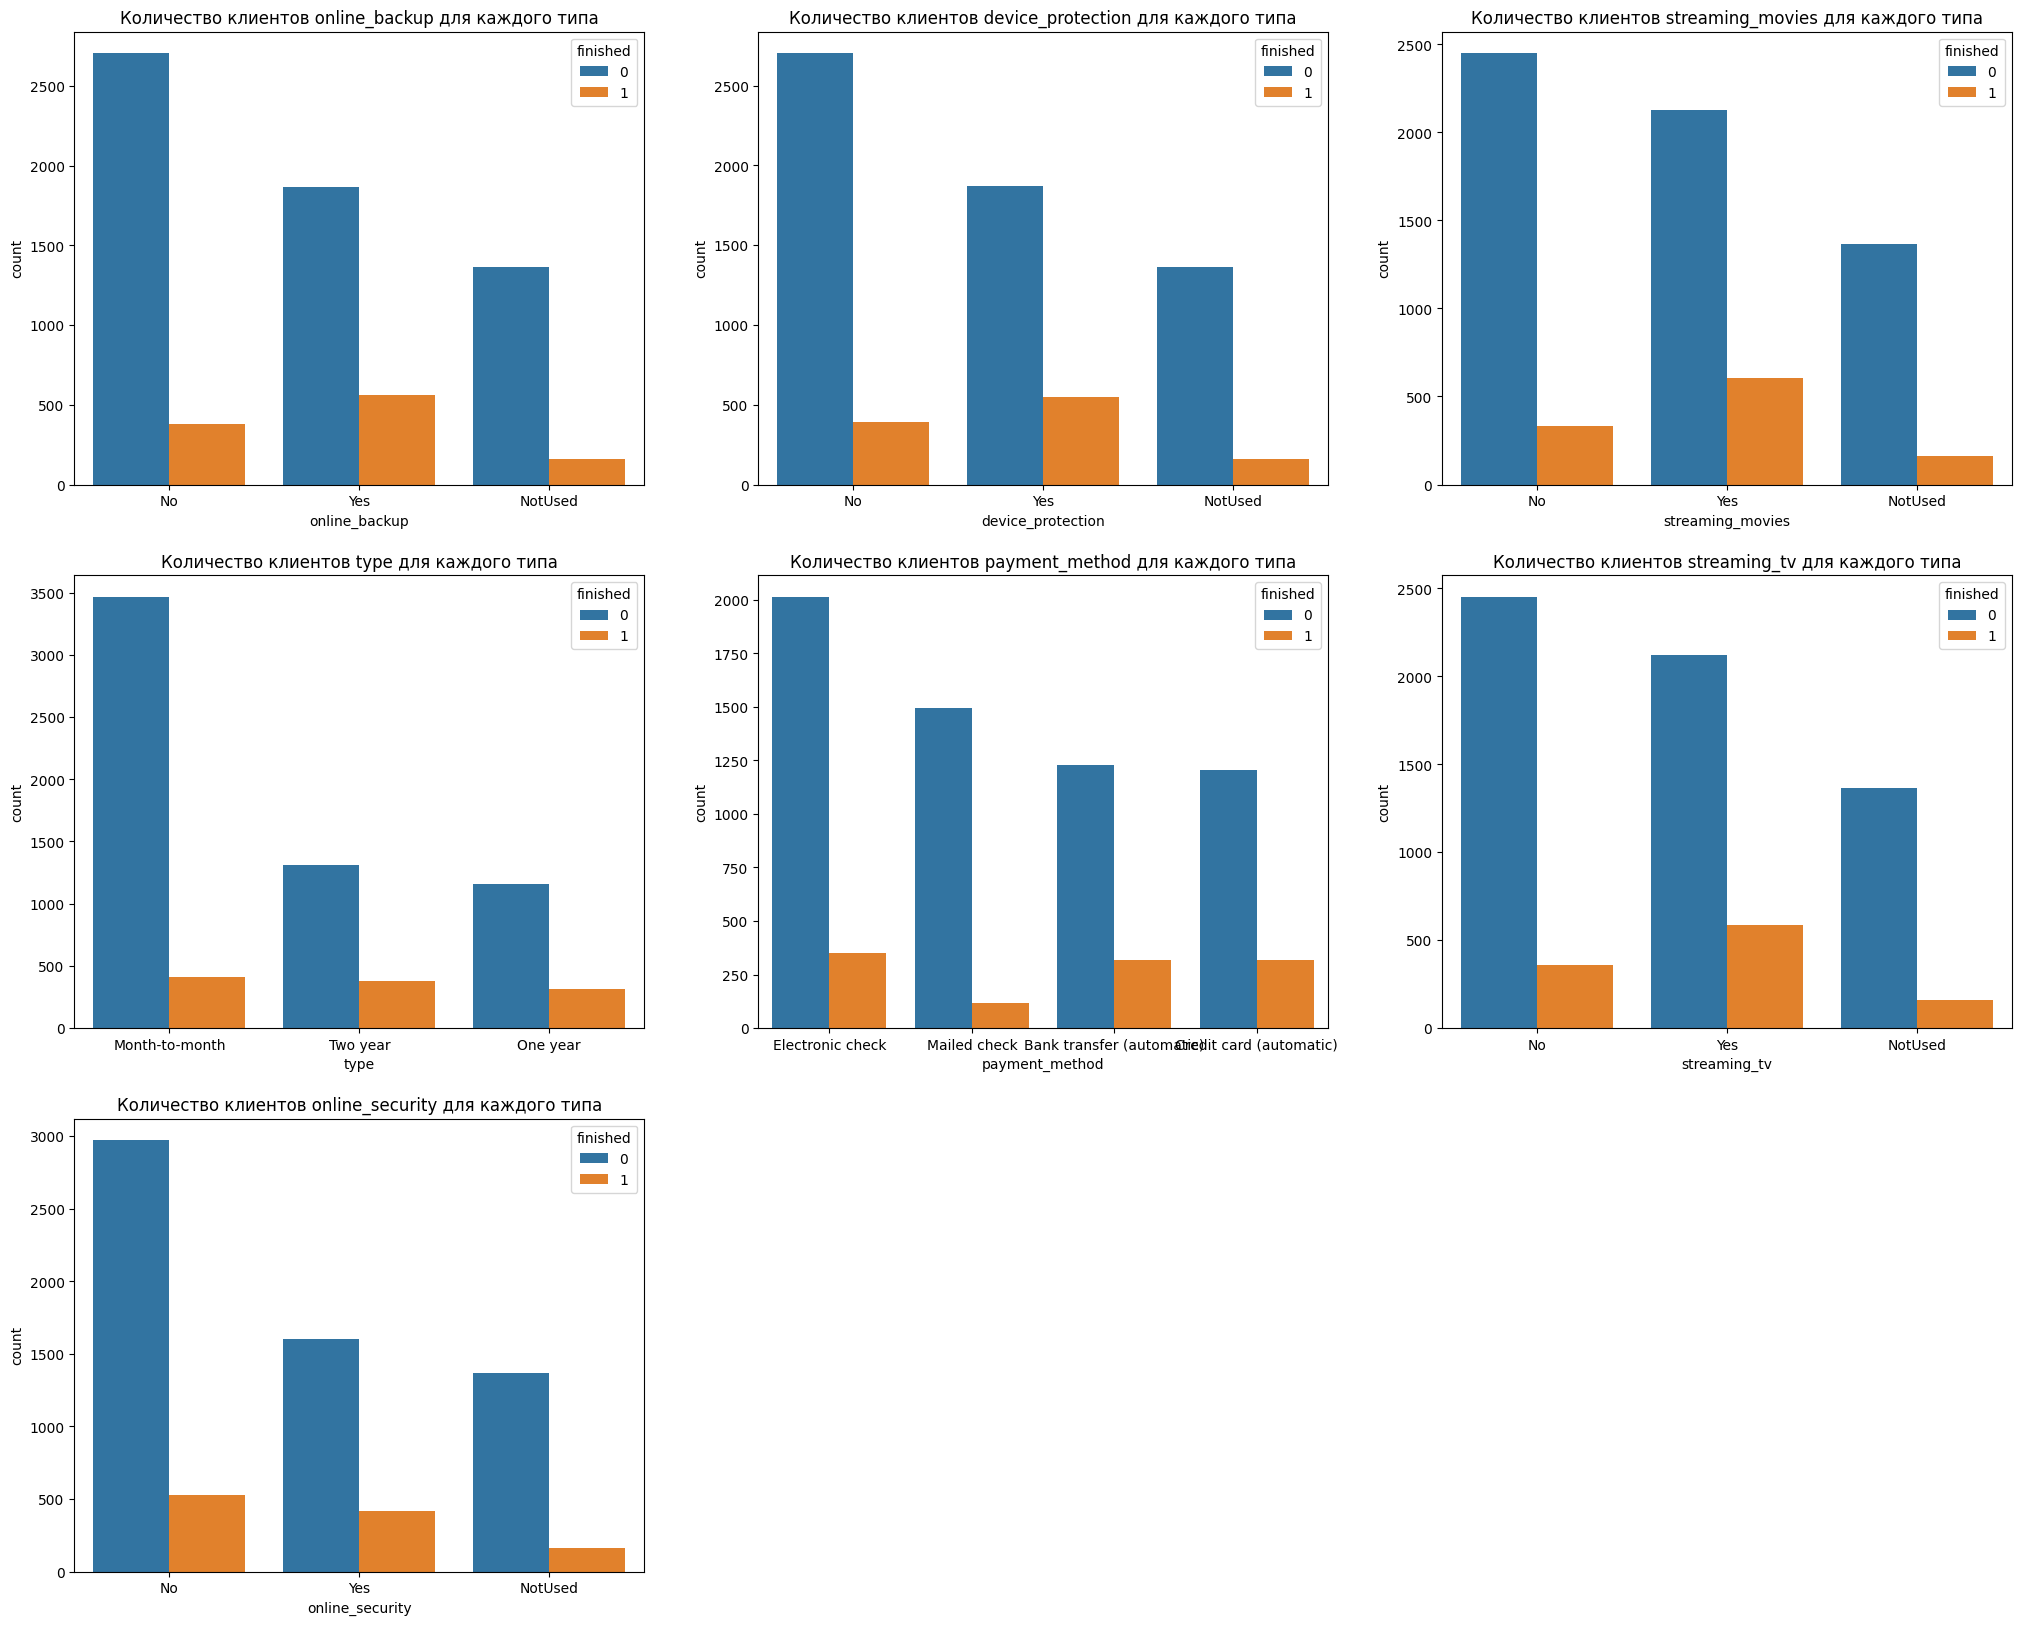

In [23]:
distribution = ['online_backup', 'device_protection', 'streaming_movies', 'type', 'payment_method','streaming_tv','online_security']

fig = plt.figure(figsize=(25,20)) 
for i, column in enumerate(distribution):
    plt.subplot(3,3,i+1)
    plt.title(f'Количество клиентов {column} для каждого типа')
   
    datab = df[column].groupby(df['finished']).value_counts().rename('count').reset_index()
    sns.barplot(x=column, y='count', hue='finished', data=datab)

Как и было понятно по коррелляции такие признаки связанные с интернетом показывают идентичные графики , возможно некоторые из них тоже придется удалить

Также по методам оплаты видно, что гораздо чаще компания теряет клиентов использующих электронные платежи.
Также стало понятно , что использующих помеясчную оплату гораздо больше, соответсвенно они и чаще расторгают договор.
Также клиенты использующие online backup чаще уходят из компании.
В остальных признаках ситуация аналогична, так как признаки интернета сильно связаны.

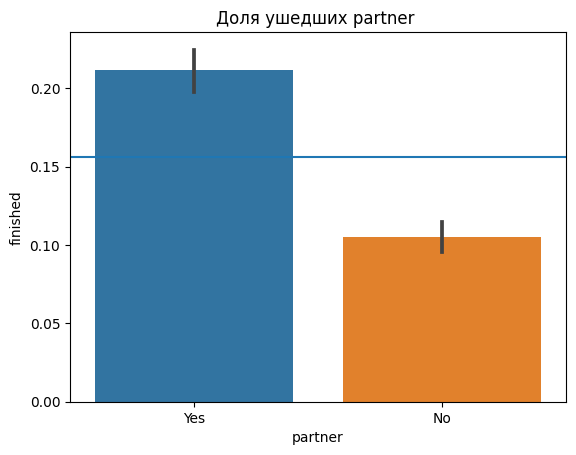

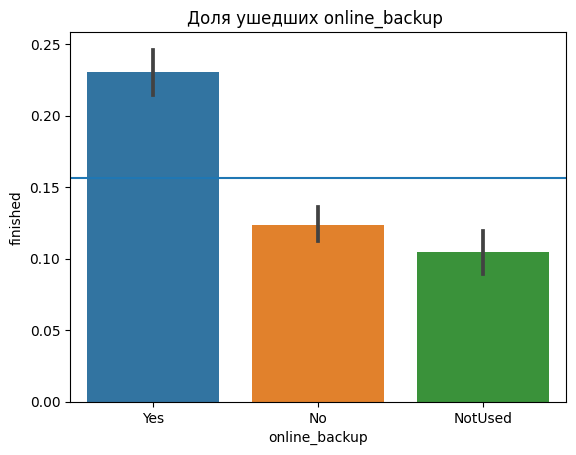

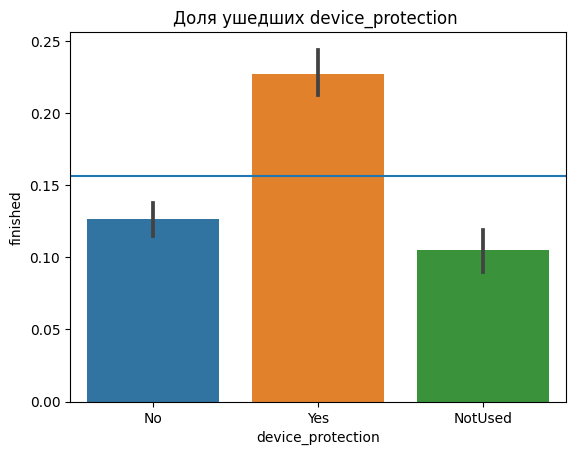

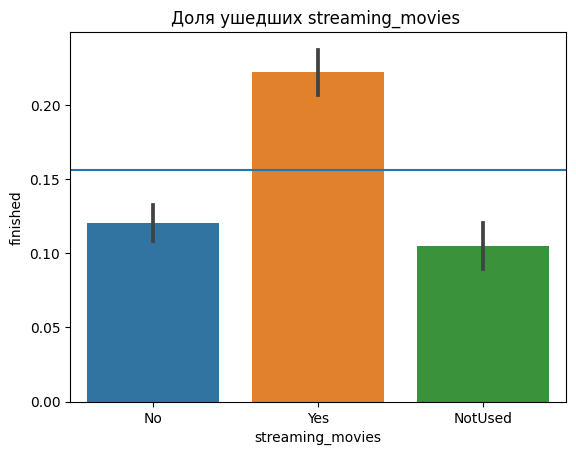

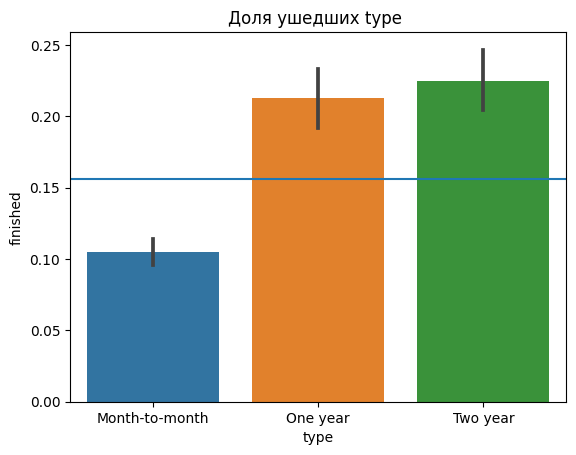

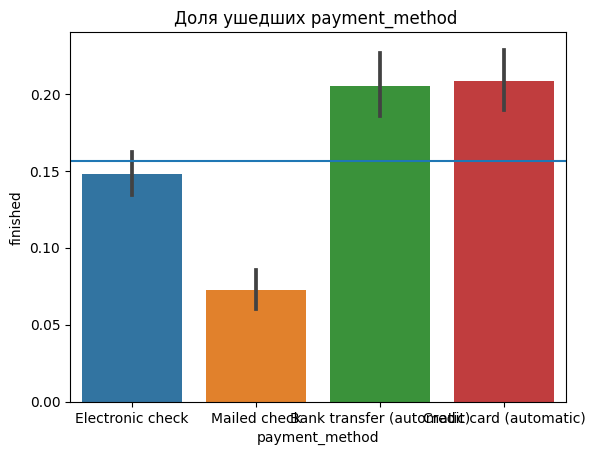

In [24]:
category = [ 'partner' ,'online_backup', 'device_protection', 'streaming_movies', 'type', 'payment_method']

for i in category:
    sns.barplot(data=df, x=i,y= 'finished')
    plt.axhline(y=0.156325)
    plt.title(f'Доля ушедших {i} ')
    plt.show()

Анализ оттока как просилось в рекомендации подтвердил выводы: так как средний отток по компании составляет около 15 процентов.Это видно по распределнию признака finished. Видно , что в каждом признаке есть категория клиентов у которой отток выше чем средний и ниже. Например те у кого есть партнер уходят чаще. Те кто использует device_protection и streaming_movies тоже уходят чаще.

Оценим количественные переменные

Для начала исследуем отток клиентов в разрезе.

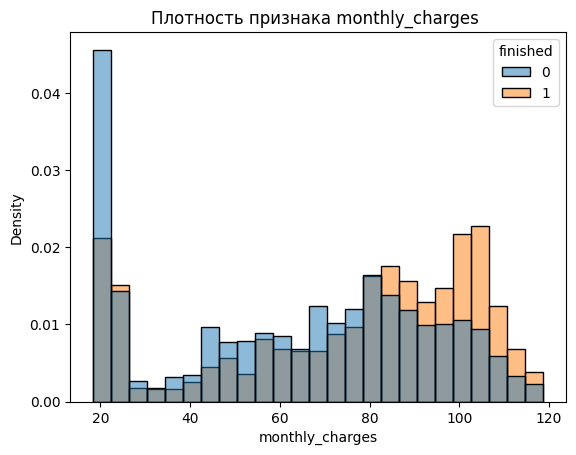

<Figure size 1500x1000 with 0 Axes>

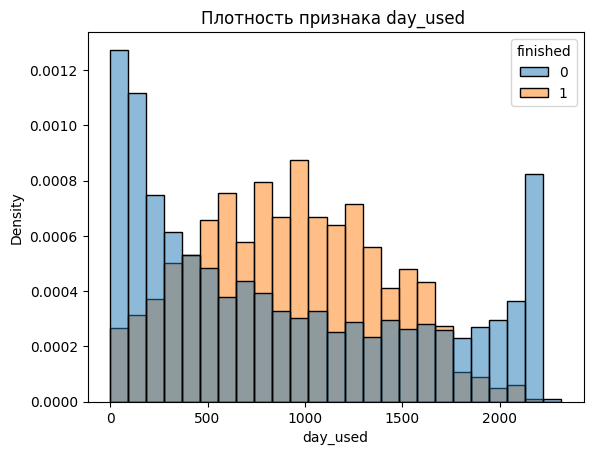

<Figure size 1500x1000 with 0 Axes>

In [25]:
numer= ['monthly_charges',  'day_used']
for i in numer:
    sns.histplot(data=df, x=i, bins=25, hue = 'finished',stat='density' ,common_norm=False)
    plt.title(f'Плотность признака {i} ')
    fig = plt.figure(figsize=(15,10)) 
    plt.show()

По графикам можно понять, что сохранение клиентов  крайне важно в периоды: 
1. когда месячные затраты в районе 30-40,60 и 80.
2. когда суммарные затраты от 500 до 1000 и в районе 5000
3. когда клиент пользуется услугами около 400 дней

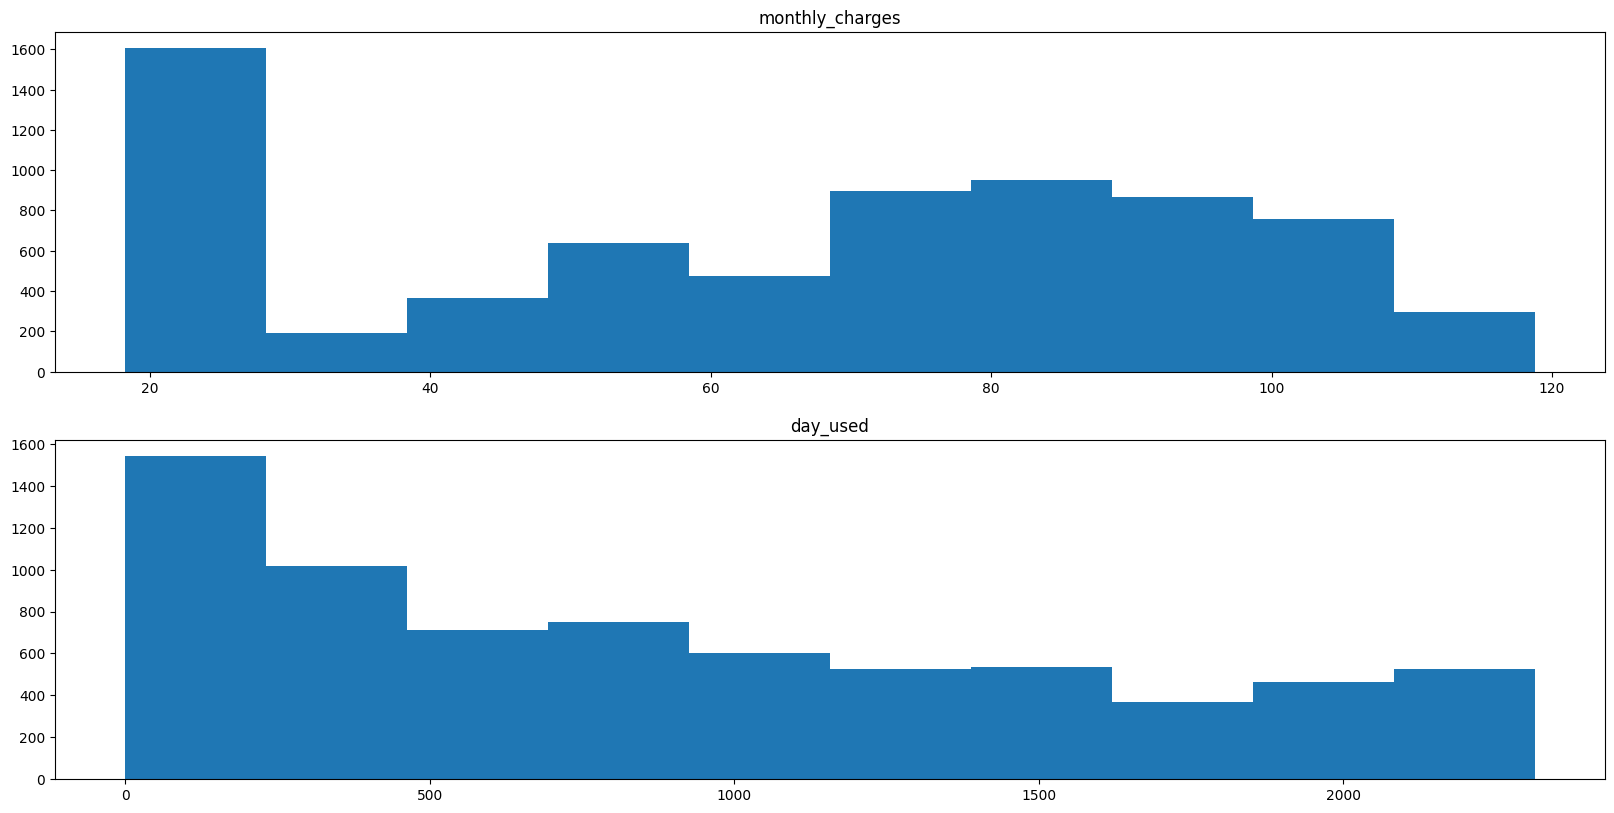

In [26]:
numer= ['monthly_charges',  'day_used']

fig = plt.figure(figsize=(20,15)) 
for i, column in enumerate(numer):
    plt.subplot(3,1,i+1)
    plt.title(f'Количество клиентов {column} для каждого типа')
    plt.hist(df[column])
    plt.title(column)

Видно , что в месячном эквиваленте многие платят в районе 20, это минимальный тариф.Дальше идет сильный спад а потом постепенно вырастает сумма месячных трат. От 70 до 100 тоже например.
Про суммарные затраты , тоже четко видно, что идет равномерное уменьшение. Многие тратят суммарно до 1000, сопоставив это с графиком использованных месяцев можно понять , что многие люди уходят в первые 15 месяцев.
По количеству использовнных дней видно, что график распределн достаточно равномерно , но есть скачки в самом начале использования услуг компании и в самом конце.

Исследование данных показало , что существуют корреляции между некоторыми признаками ( например между общими затратами и количестовм месяцев клиента в компании).

Также стало видно , что многие клиенты уходят в первые месяцы использования. Распределения большинства признаков достаточно нормально, но в некоторых видно , что уходят люди чаще использующие помесячную оплату использующие 'fiber optic' и платящие электронно,

## Подготовка признаков

Для обучения будутт использоваться две модели случайного леса , линейной регресии и catboost



Целевая метрика AUC-ROC.

Проверим дисбаланс классов

In [27]:
df['finished'].value_counts(normalize=True)

0    0.843675
1    0.156325
Name: finished, dtype: float64

Будем использовать кодирование и стандартизацию для логистической регрессии и случайного леса,
но для начала разделим данные , чтобы не произошло утечки

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               7043 non-null   object 
 1   paperless_billing  7043 non-null   object 
 2   payment_method     7043 non-null   object 
 3   monthly_charges    7043 non-null   float64
 4   finished           7043 non-null   int64  
 5   day_used           7043 non-null   int64  
 6   internet_service   7043 non-null   object 
 7   online_security    7043 non-null   object 
 8   online_backup      7043 non-null   object 
 9   device_protection  7043 non-null   object 
 10  tech_support       7043 non-null   object 
 11  streaming_tv       7043 non-null   object 
 12  streaming_movies   7043 non-null   object 
 13  senior_citizen     7043 non-null   int64  
 14  partner            7043 non-null   object 
 15  multiple_lines     7043 non-null   object 
dtypes: float64(1), int64(3),

Обозначим переменную

In [29]:
rnd = 3072023

Отделим целевой признак

In [30]:
features = df.drop(['finished'], axis=1)
target = df['finished']

features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=rnd
)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               7043 non-null   object 
 1   paperless_billing  7043 non-null   object 
 2   payment_method     7043 non-null   object 
 3   monthly_charges    7043 non-null   float64
 4   finished           7043 non-null   int64  
 5   day_used           7043 non-null   int64  
 6   internet_service   7043 non-null   object 
 7   online_security    7043 non-null   object 
 8   online_backup      7043 non-null   object 
 9   device_protection  7043 non-null   object 
 10  tech_support       7043 non-null   object 
 11  streaming_tv       7043 non-null   object 
 12  streaming_movies   7043 non-null   object 
 13  senior_citizen     7043 non-null   int64  
 14  partner            7043 non-null   object 
 15  multiple_lines     7043 non-null   object 
dtypes: float64(1), int64(3),

In [32]:
category = [ 'type', 'paperless_billing', 'payment_method', 'senior_citizen', 'partner','internet_service',
 'online_security','online_backup','device_protection','tech_support','streaming_tv','streaming_movies','multiple_lines']

In [33]:
numer = ['monthly_charges','day_used']

## Обучение моделей

Обучим модель случайного леса. Используем методы make_pipline и make_column_transformer . Также используем масштабирование количественных признаков.

In [34]:
features_train_rf = features_train.copy()
features_test_rf = features_test.copy()

In [35]:
transformer_rf = make_column_transformer((StandardScaler(),numer),
                                          (OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value = -1),category),
                                          remainder='passthrough')
model_rf = RandomForestClassifier(random_state = rnd)
pipline_rf = make_pipeline(transformer_rf, model_rf)

param_grid_rf = {
    'randomforestclassifier__n_estimators': range(50, 251, 50),
    'randomforestclassifier__max_depth': range(2, 10),
    'randomforestclassifier__min_samples_split': (2, 3, 4),
    'randomforestclassifier__min_samples_leaf': (1, 2, 3, 4)
}

grid_rf = RandomizedSearchCV(
    pipline_rf, 
    param_distributions=param_grid_rf, 
    scoring='roc_auc', 
    n_jobs=-1, 
    random_state=rnd
)

grid_rf.fit(features_train_rf, target_train)

grid_rf_best_score = grid_rf.best_score_ 
grid_rf_best_params = grid_rf.best_params_
print(f'лучший результат: {grid_rf_best_score}')
print(f'лучшие параметры: {grid_rf_best_params}')

лучший результат: 0.8237523980612818
лучшие параметры: {'randomforestclassifier__n_estimators': 200, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__max_depth': 8}


Результат хороший , но не удоволетворяет нас.

In [36]:
features_train_cat = features_train.copy()
features_test_cat = features_test.copy()

In [37]:
features_train_cat.info()
display(features_train_cat)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5282 entries, 5358 to 5841
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               5282 non-null   object 
 1   paperless_billing  5282 non-null   object 
 2   payment_method     5282 non-null   object 
 3   monthly_charges    5282 non-null   float64
 4   day_used           5282 non-null   int64  
 5   internet_service   5282 non-null   object 
 6   online_security    5282 non-null   object 
 7   online_backup      5282 non-null   object 
 8   device_protection  5282 non-null   object 
 9   tech_support       5282 non-null   object 
 10  streaming_tv       5282 non-null   object 
 11  streaming_movies   5282 non-null   object 
 12  senior_citizen     5282 non-null   int64  
 13  partner            5282 non-null   object 
 14  multiple_lines     5282 non-null   object 
dtypes: float64(1), int64(2), object(12)
memory usage: 660.2+ KB


,type,paperless_billing,payment_method,monthly_charges,day_used,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,senior_citizen,partner,multiple_lines
5358,Month-to-month,No,Mailed check,19.25,549,NotUsed,NotUsed,NotUsed,NotUsed,NotUsed,NotUsed,NotUsed,0,No,No
6271,One year,Yes,Electronic check,85.90,822,Fiber optic,Yes,No,Yes,No,No,No,1,Yes,Yes
3841,Month-to-month,Yes,Electronic check,96.50,1157,Fiber optic,No,Yes,No,No,Yes,Yes,1,Yes,Yes
3695,Month-to-month,Yes,Electronic check,98.85,975,Fiber optic,No,Yes,No,No,Yes,Yes,0,Yes,Yes
1457,One year,Yes,Electronic check,108.30,1279,Fiber optic,No,No,Yes,Yes,Yes,Yes,0,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,One year,Yes,Electronic check,56.45,2163,DSL,Yes,Yes,No,No,Yes,Yes,1,No,NotUsed
3511,Two year,No,Mailed check,24.60,213,NotUsed,NotUsed,NotUsed,NotUsed,NotUsed,NotUsed,NotUsed,0,No,Yes
6227,Month-to-month,No,Bank transfer (automatic),46.05,92,DSL,No,No,No,No,No,No,0,No,No
4472,Two year,No,Credit card (automatic),80.35,2071,Fiber optic,Yes,No,Yes,No,No,No,0,Yes,No


In [38]:
cat_features = [ 'type', 'paperless_billing', 'payment_method', 'senior_citizen', 'partner','internet_service',
 'online_security','online_backup','device_protection','tech_support','streaming_tv','streaming_movies','multiple_lines']

In [39]:
cat_features

['type',
 'paperless_billing',
 'payment_method',
 'senior_citizen',
 'partner',
 'internet_service',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'multiple_lines']

In [40]:
%%time
#с make_column_tranformer не смог добиться нужного результата , а так поолучилось
#transformer_ = make_column_transformer((StandardScaler(),cat_features),remainder='passthrough')
model_cat =  CatBoostClassifier(random_state=rnd, verbose=False,cat_features = cat_features)

CPU times: user 76 µs, sys: 43 µs, total: 119 µs
Wall time: 121 µs


In [41]:
pipline_cat = make_pipeline(model_cat)

param_grid_cat = {
    'catboostclassifier__learning_rate': [0.01,0.1,0.2],
    'catboostclassifier__iterations': range(100,301,100),
    'catboostclassifier__l2_leaf_reg': [1,2]
}

gs_cat = GridSearchCV(
    pipline_cat, 
    param_grid=param_grid_cat, 
    scoring='roc_auc', 
    n_jobs=-1, 
    cv=5
)

gs_cat.fit(features_train_cat, target_train)

gs_cat_best_score = gs_cat.best_score_ 
gs_cat_best_params = gs_cat.best_params_
print(f'best_score: {gs_cat_best_score}')
print(f'best_params: {gs_cat_best_params}')

best_score: 0.9027507639708985
best_params: {'catboostclassifier__iterations': 300, 'catboostclassifier__l2_leaf_reg': 1, 'catboostclassifier__learning_rate': 0.2}


Лучше всех показала себя модель бустинга кэтбуст с параметрами :'catboostclassifier__iterations': 300, 'catboostclassifier__l2_leaf_reg': 1, 'catboostclassifier__learning_rate': 0.2
 она показала результат : 0.90

## Тестирование моделей

Проверим catboost  на тестовом наборе данных

In [42]:
predicted_test = gs_cat.best_estimator_.predict(features_test)
probabilities_test = gs_cat.best_estimator_.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)
accuracy = accuracy_score(target_test, predicted_test)

In [43]:
print(f" ROC-AUC  на тесте: {auc_roc}")
print(f"Accuracy  на тесте: {accuracy}")

 ROC-AUC  на тесте: 0.9108571350962257
Accuracy  на тесте: 0.9193639977285634


На тестовой выборке модель показала прекрасный результат. Как в целевой метрике так и в accuracy, который показывает долю правильных ответов.

Выведем важность признаков

In [44]:
feature_importances = feature_importances = gs_cat.best_estimator_._final_estimator.feature_importances_
feature_importances

array([ 8.45245014,  1.70241429,  5.59181255, 11.99893356, 47.62602066,
        0.9807323 ,  3.55626649,  2.22684618,  2.79218104,  2.56254634,
        1.84644105,  2.11626703,  1.23152804,  3.90623893,  3.40932139])

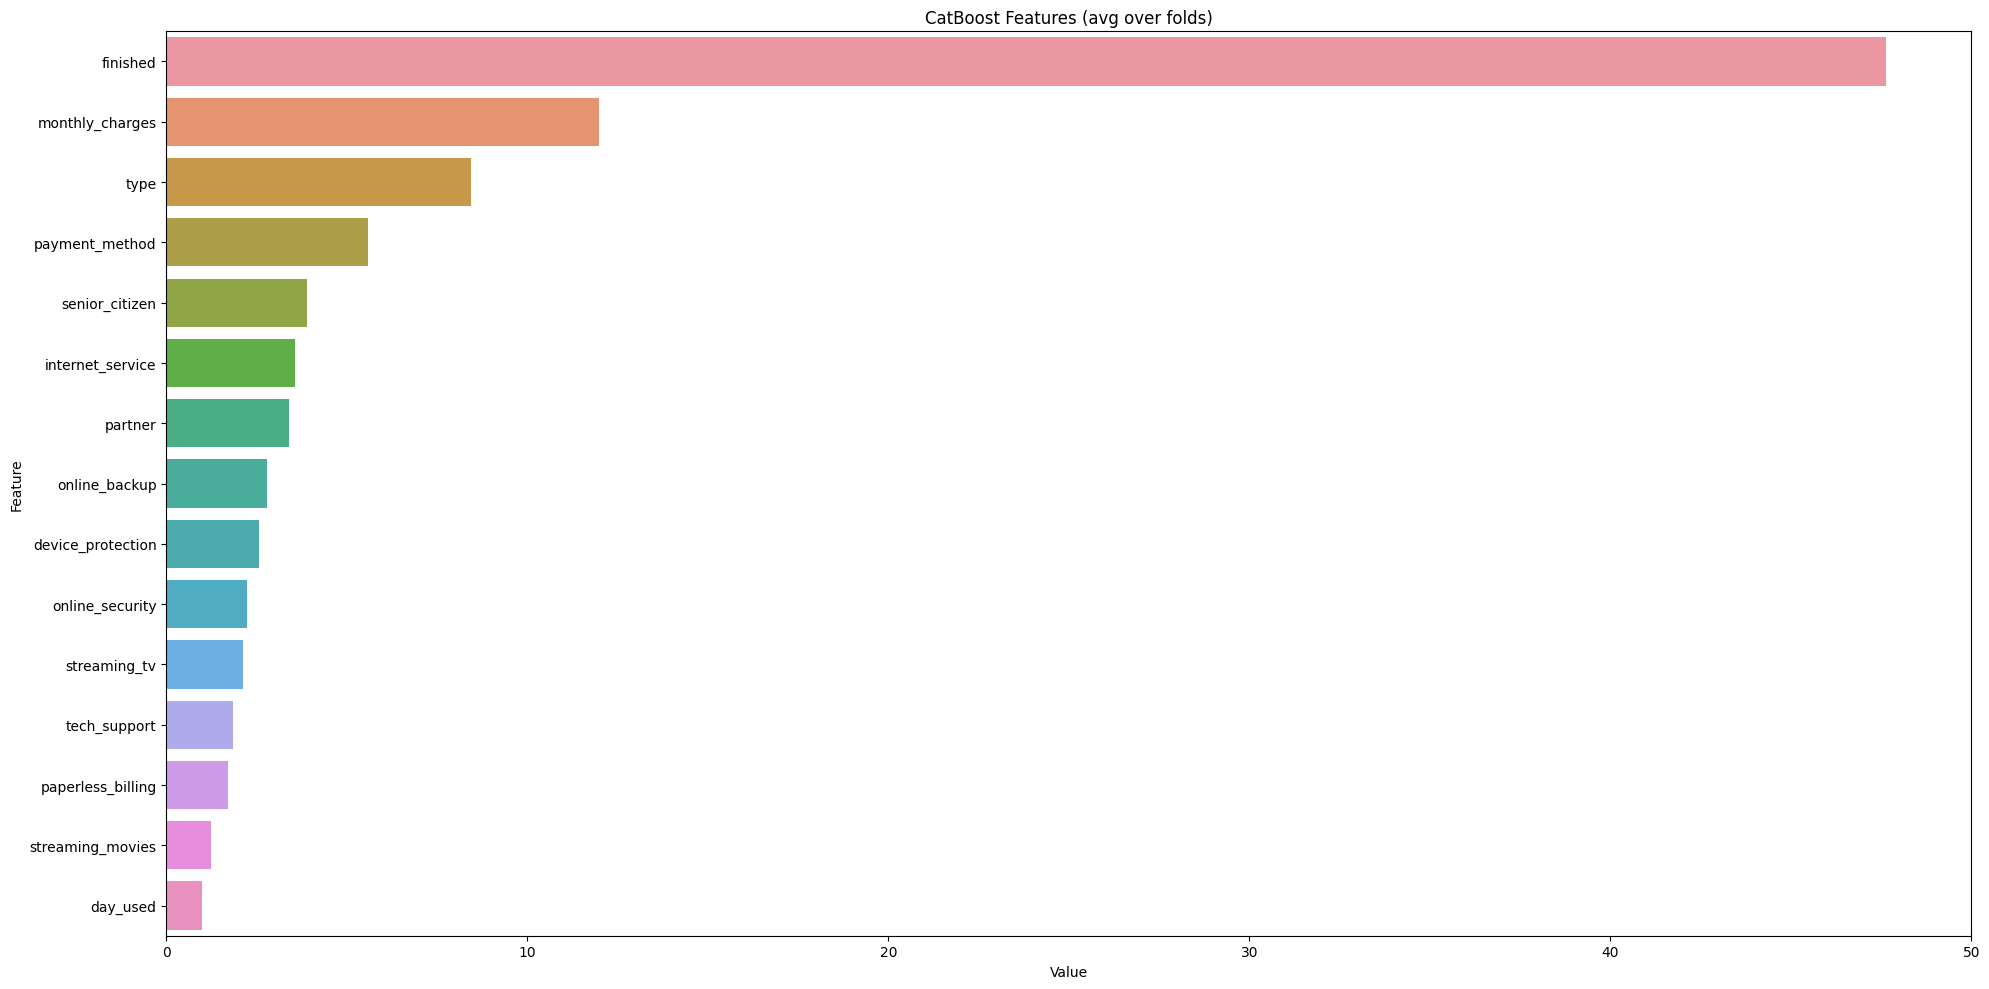

In [45]:
featur = pd.DataFrame(sorted(zip(feature_importances, df.columns))
                           , columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=featur.sort_values(by="Value", ascending=False))
plt.title('CatBoost Features (avg over folds)')
plt.tight_layout()
plt.show()


Самыми важными признаками оказались месячные траты , типы оплаты и наличие супруга , а самыми неважными техническая поддержка прочие интернет признаки и количество использованных дней.

построим матрицу ошибок

In [46]:
from sklearn.metrics import confusion_matrix

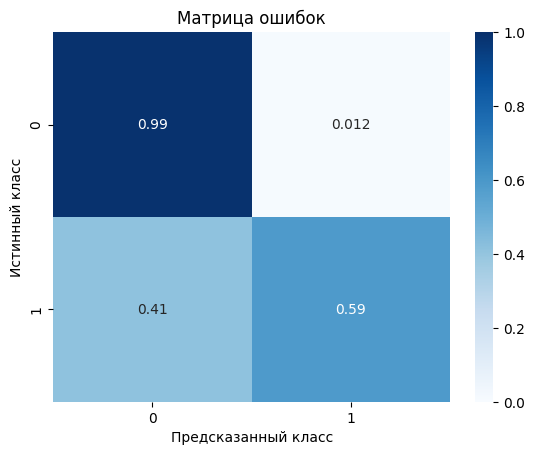

In [47]:
pred = predicted_test
conf_matrix = confusion_matrix(target_test,pred, normalize='true')
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap='Blues', vmin=0, vmax=1)
plt.title('Матрица ошибок')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.show()

матрица показывает , что прогноз совпал с реальностью,как и было предсказано моделью в 99 процентов когда речь идет о том , что клиент не уйдет. и в 60 процентах случаев когда речь идет о том , что клиент уйдет. Модель также может ошибается когда предсказывает что клиент не уйдет , а он уходит.

Построим roc кривую и сравним со случайной.

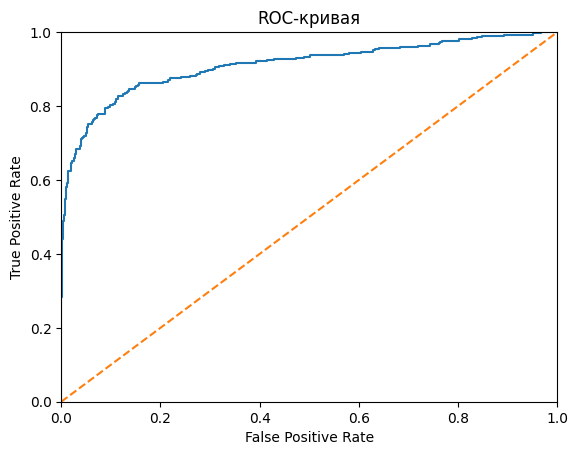

In [48]:
probabilities_test_cat = gs_cat.predict_proba(features_test)
fpr, tpr, thresholds = roc_curve(target_test, probabilities_test_cat[:, 1])

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

In [53]:
models= pd.DataFrame({'model': ['random_froest', 'Catboost'],
        'auc_roc': [0.82,0.90]
        })

models

,model,auc_roc
0,random_froest,0.82
1,Catboost,0.90


Видно , что наша модель достаточно неплохо себя показала и намного лучше случайно.

Была проведена тестировка лучшей модели кэтбуст которая показала результат целевой метрики в 0.9 что удоволетворяет нашим требованиям.Также были построены матрица ошибок roc кривая  и проанализировано важность признаков. Можно увидеть, что с моделью есть куда работать и совершенствовать  ее, но целевая метрика нас удоволетворяет

## Выводы и отчет

Целью проекта было спрогнозировать отток клиентов с помощью модели машинного обучения , чтобы компания могла удержать  клиентов.
Цель проекта выполнена модель научилась  предсказывать клиентов, которые могут уйти.
Ключевыми шагами в работе над проектом были задачи:

    1. Загрузить и ознакомиться подобнее с данными.
    2. Провести предобработку данных.
    3. Провести исследовательский анализ данных.
    4. Подготовить данных к обучению
    5. Обучить несколько моделей и выбор лучшей
    6. Тестировка лучшей модели 
    7. Написать выводы по работе
   В ходе проекта были учтены все задачи и шаги проекта соответсвуют им. Ниже они описаны подробнее
1. Для начала был составлен план работы. Которому мы следовали в течение всего проекта.Были составлены цели и задачи.Были описаны услуги компании и прочие исходные данные.
2. Далее загрузили данные, ознакомились с ними .Посмотрели данные про исходные 4 датасета.Ознакомились с начальными строками и структурой. Далее поработали со столбцами и  привели их названия к корректному написанию . Стало понятно , что есть информация о 7043 пользователях, которые пользуются услугами компании . Из них 5517 полузуются услугами Интернета и 6361 - стационарным телефоном.Мы определили, что будет решаться задача  классификации.
3. Предобработка данных.Далее мы ознакомились с каждым из четырех датасетов. Пропусков обнаружено не было, также не обнаружилось дубликатов.Нашли неявные дубликаты и заменили их.Назавния признаков были скорректированы и приведены к стандартному формату вот они  с описанием 
              
 1.  paperless_billing  - электронный платёжный документ
 2.   payment_method   - способ оплаты
 3.   monthly_charges  - месячные затраты  
 4.   day_used         - сколько дней человек пользуется услугами компании  
 5.   internet_service   - наличие у клиента интернет сервисов
 6.   online_security  - наличие у клиента онлайн защиты
 7.   online_backup     - наличие резервного копирования
 8.   device_protection  - наличие у клиента защиты устройства
 9.   tech_support       - наличие услуги технической поддержки
 10.  streaming_tv       - наличие транляции телевидения
 11.  streaming_movies  - наличие трансляции фильмов
 12.  senior_citizen    - наличие пенисонного статуса
 13. partner - наличие партнера
 14.  multiple_lines  - наличие возможности ведения параллельных линий о время звонка
 15. type - тип оплаты
 16. finished - закончил клиент пользоватся услугами или нет.
 
 
признаки обучения модели описаны выше. Для категориальных признаков использовался Ordinal Encoder , чтобы кодировать. А для двух числовых использовался метод StandardScaler для стандартизирования.Поменяли тип данных в столбцах с датой. Также были объединены все четыре датасета. Был создан целевой признак с помощью столбца с датой, который показывает ушел человек  или нет.
          Также была высчитана разница дат между началом пользования услугами компании и концом, соответственно признаки с началом и концом пользования услгуами стали не нужны.Также был удален признак customer_id который был нужен для объединения датасетов.А еще обнаружилось,  что признак gender и dependets не влияют на целевой поэтому пришлось их удалить.А признак tota_charges имеел сильную корреляцию с признаком monthly_charges и портил обшую иетрику его тоже пришлось удалить.
4. Исследовательский анализ данных.Был изучен портрет клиента. С помощью графиков стало видно , тчто некоторые признаки не влияют никак на целевой признак, что подтвердилось после составления матрицы корреляций.Были сделаны выводы  


    1. От пола не зависит уйдет клиент или нет
    2. Люди не имеющие супруга чаще уходят
    3. клиентов не имеющих иждтвенцев гораздо больше, и они как раз чаще расторгают договор.
    4. Пенсионеров гораздо меньше , и количество пенисонеров расторгнувших договор достаточно много .
    
    
    Также после построения матрицы корреляций сталро понятно, что большинство признаков не имеют сильных связей. Был удален признак gender, dependents и total_charges. Первые два по причине того , что не имеют влияния на целевой признак а третий, потому что имел сильную связь с month_charges.
    Также были далее исследованы остальные признаки . Категориальные и численные отдельно.
    Стало ясно что, Также по методам оплаты видно, что гораздо чаще компания теряет клиентов использующих электронные платежи.Также стало понятно , что использующих помеясчную оплату гораздо больше, соответсвенно они и чаще расторгают договор.Также клиенты использующие online backup чаще уходят из компании.В остальных признаках ситуация аналогична, так как признаки интернета сильно связаны.Также после анализа обнаружилось , что соотношение ушедших по каждому отдельному признаку не более 25 процентов от общей масссы.По графикам можно численных признаков  понять, что сохранение клиентов  крайне важно в периоды: 
1. когда месячные затраты в районе 30-40,60 и 80.
2. когда суммарные затраты от 500 до 1000 и в районе 5000
3. когда клиент пользуется услугами около 400 дней А еще то , что Видно , что в месячном эквиваленте многие платят в районе 20, это минимальный тариф.Дальше идет сильный спад а потом постепенно вырастает сумма месячных трат. От 70 до 100 тоже например.Про суммарные затраты , тоже четко видно, что идет равномерное уменьшение. Многие тратят суммарно до 1000, сопоставив это с графиком использованных месяцев можно понять , что многие люди уходят в первые 15 месяцев.По количеству использовнных дней видно, что график распределн достаточно равномерно , но есть скачки в самом начале использования услуг компании и в самом конце.
5. Далее была проведена подготовка признаков пере обучением модели.Для начала был исследован дисбаланс классов. Были выделены целевой признак и остальные. Далее был проведен сплит данных на обучающую и тестовую выборки. А потом категориальные и числовые признаки разделены для дальнейшего обучения моделей.
6. Первой моделью была модель случайного леса .В ходе обучения которой были использованы методы make_column_transformer и make_pipeline. Но модель все равно не смогла даже с подбором параметров она не смогла показать нужный результат.Далее была обучена модель Catboost которая намного лучше справилась с поставленной задачей. Были подобраны параметры ('catboostclassifier__iterations': 300, 'catboostclassifier__l2_leaf_reg': 1, 'catboostclassifier__learning_rate': 0.2}) и модель смогла показать результат 0.9 auc roc.
7. Далее на тестировании она показала себя чуть лучше и получила результат 0.91 и accuracy 0.92 , что очень хорошо.Была исследована матрица ошибок , которая показала , что модель достаточно хорого предсказывает , но может ошибаться, определяя человека надежным, хотя тот уходит.Была также исследована auc roc кривая , которая показала , что модель намного лучше случайно. А также самыми важными признаками оказались месячные траты , типы оплаты и наличие супруга , а самыми неважными техническая поддержка прочие интернет признаки и количество использованных дней.Таким образом можно сказать, что все цели и задачи были выполнены и результат удоволетворяет необходимым показателям.
8. Рефлексия. Сложности возникли с получением нужной метрики. Проблему удалось решить с помощью уддаления некоторых признаков. В частности total_charges а также использованием метода pipeline. Также были проблемы в исследовательской части с построением матрицы корреляции помог метод phig_matrix.

Cводная таблица с результатами моделей на обучении.

In [50]:
models

,model,auc_roc
0,random_froest,0.82
1,Catboost,0.90


Матрица ошибок и график важности признаков комментарии по которым были даны чуть выше.

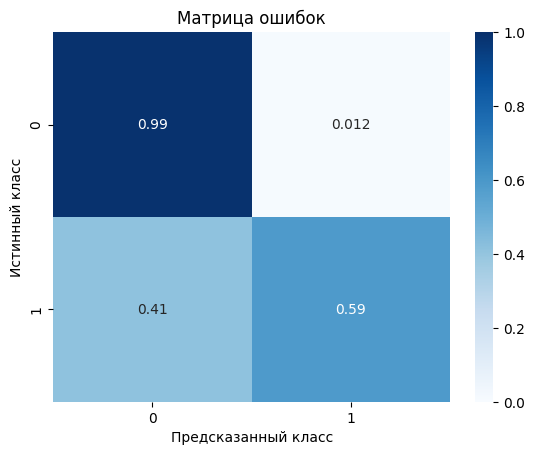

In [51]:
pred = predicted_test
conf_matrix = confusion_matrix(target_test,pred, normalize='true')
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap='Blues', vmin=0, vmax=1)
plt.title('Матрица ошибок')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.show()

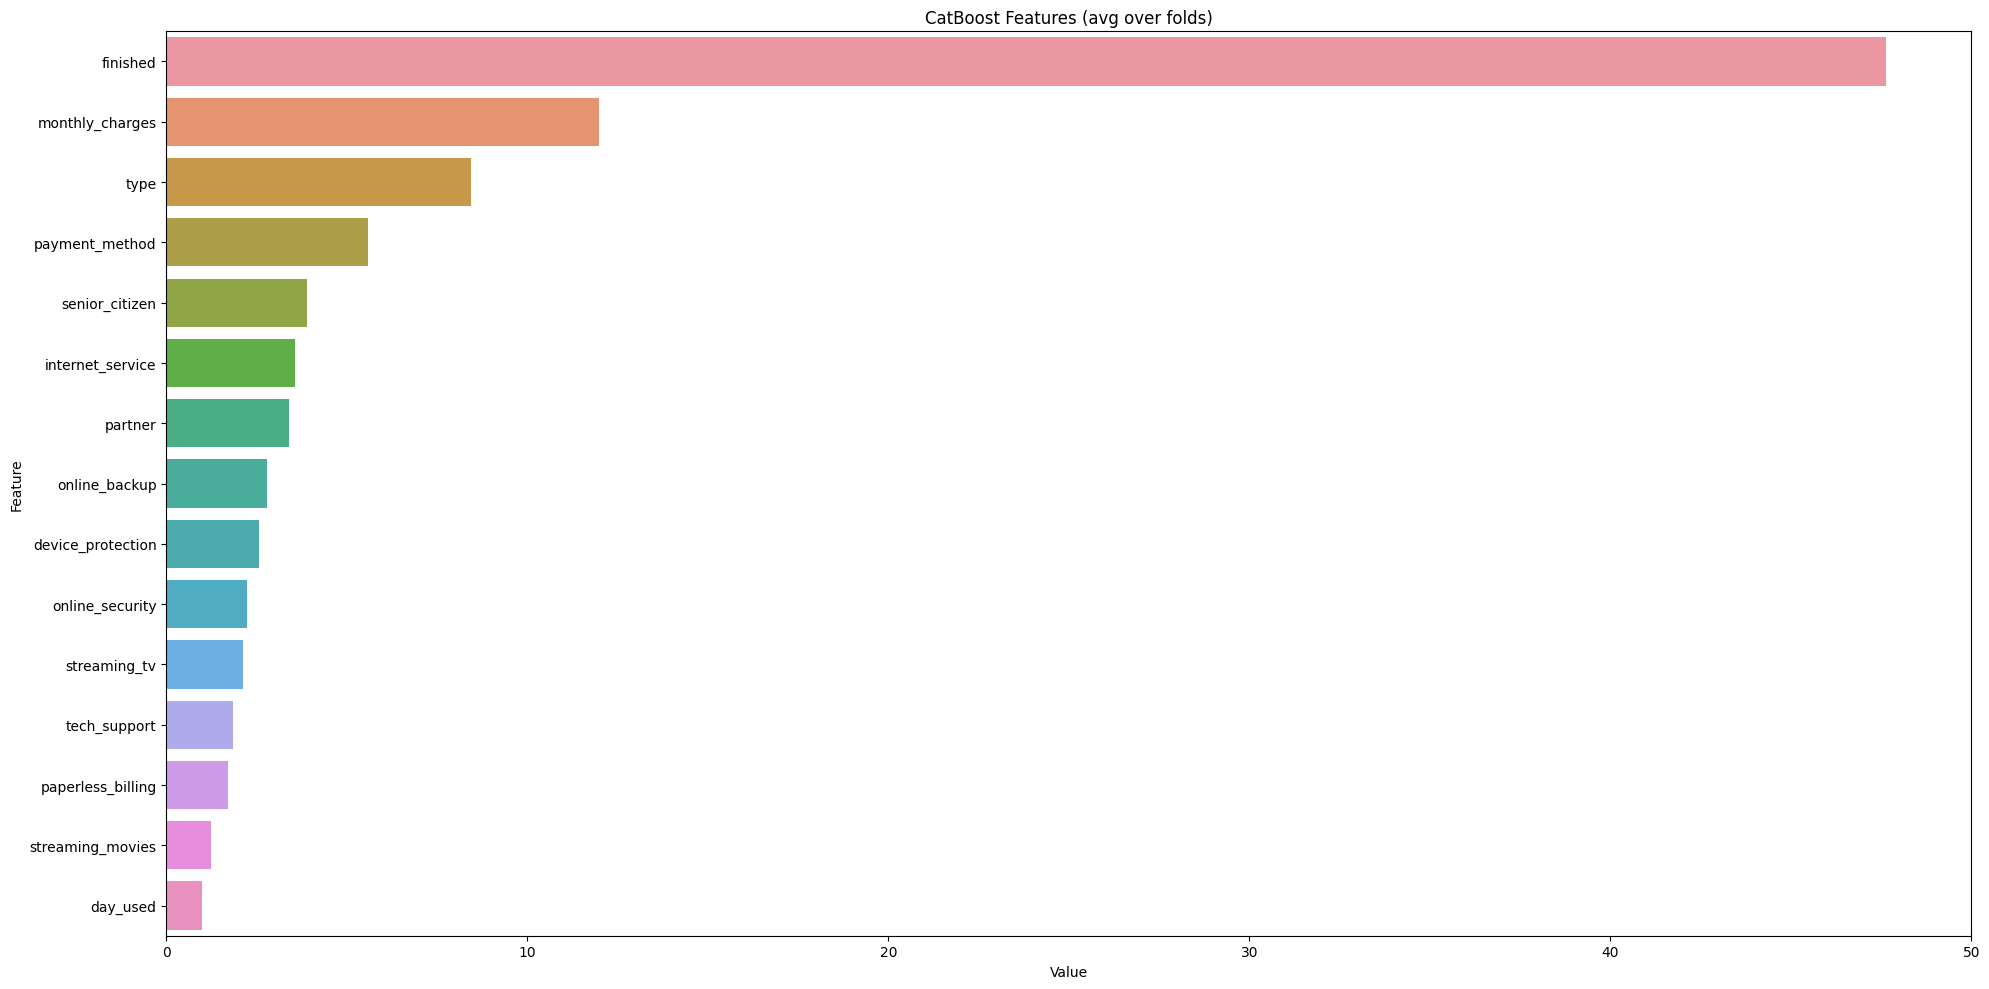

In [52]:
featur = pd.DataFrame(sorted(zip(feature_importances, df.columns))
                           , columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=featur.sort_values(by="Value", ascending=False))
plt.title('CatBoost Features (avg over folds)')
plt.tight_layout()
plt.show()
